# Analysis of Prosper Loan Data 
### by Oluwadamilotun Kehinde Oguntuga



## Introduction
The Prosper Loan dataset contains one hundred and thirteen thousand records of loans given by Prosper. It contains the details of the borrower information and how the loans are being serviced. It also documents the variables surrounding the borrowing of the loans such as the number of investors, monthly loan payments. The dataset contains a risk score known as the Prosper Score issued by prosper to assess the borrowers based on past loans.



## Preliminary Wrangling


In [1]:
# import all necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
# Get the first five rows of the dataset
prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Get the shape of the dataset
prosper.shape

(113937, 81)

In [5]:
# Get the info of the dataset
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataset contains 113,937 loans(as rows) and 81 features of each loan (as columns). Of the 81 features, 61 are of the numeric datatypes and this indicates that the dataset is largely made of features that describe numeric variables. 

### What is/are the main feature(s) of interest in your dataset?

> What are the factors that most strongly affect the scheduled monthly loan payments?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Term
2. LoanStatus
3. BorrowerAPR
4. BorrowerRate
6. LenderYield
7. ProsperScore
8. Occupation
9. EmploymentStatus
10. EmploymentStatusDuration
11. DebtToIncomeRatio
12. MonthlyLoanPayment
13. Recommedations
14. Investors

## Data Wrangling

In [6]:
# get a sample of the dataset for visual assessment
prosper.sample(20)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
107508,150435000186547329D7C4D,483144,2010-11-07 12:27:21.233000000,NaN,36,Completed,2011-06-03 00:00:00,0.31053,0.2750,0.2650,...,-17.82,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,81
91000,6C3E33870080013377B1179,119750,2007-04-05 21:23:35.163000000,C,36,Completed,2007-06-28 00:00:00,0.15412,0.1470,0.1270,...,-9.44,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,227
57419,221A354403434274648E1B3,578641,2012-04-14 07:17:25.360000000,NaN,60,Chargedoff,2014-01-17 00:00:00,0.35838,0.3304,0.3204,...,-50.35,0.0000,3487.31,3487.31,0.0,1.0,0,0,0.0,8
5282,955C3471522681505FCFF5B,439224,2009-12-20 06:13:49.930000000,NaN,36,Completed,2012-12-06 00:00:00,0.10436,0.0835,0.0735,...,-63.78,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,143
87960,5FFA3426767201802ECBC3B,371246,2008-07-21 22:11:38.360000000,B,36,Completed,2011-07-26 00:00:00,0.16941,0.1550,0.1450,...,-107.49,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,180
90077,BFA5356780061672403C680,702940,2013-01-20 13:45:59.553000000,NaN,36,Completed,2013-12-03 00:00:00,0.15833,0.1299,0.1199,...,-34.00,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,89
52162,1E203595155288569E76653,992464,2013-11-13 11:35:52.903000000,NaN,36,Current,NaN,0.32436,0.2849,0.2749,...,-9.90,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,35
96293,F3E63598592616746CEE45A,1102758,2013-12-22 08:56:23.153000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-5.05,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,1
50760,CDFB3588980067860F9C7F3,893227,2013-09-12 16:56:42.890000000,NaN,36,Current,NaN,0.20462,0.1679,0.1579,...,-60.10,0.0000,0.00,0.00,0.0,1.0,0,0,0.0,1
22197,56943400226787301FE0E1F,203513,2007-09-18 17:58:04.363000000,B,36,Chargedoff,2009-06-03 00:00:00,0.13433,0.1273,0.1173,...,-73.07,0.0000,4405.82,4405.82,0.0,1.0,0,0,0.0,128


In [7]:
# get the descriptive statistics of the dataset for programmatic assessment
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
# get the number of unique values in the dataset
prosper.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [9]:
# get the sum of the duplicated values in the columns of the dataset
prosper.duplicated().sum()

0

In [10]:
# Make a copy of the dataframe.
prosper_clean = prosper.copy()

### Issues:
1. Certain columns have too few values and will not significantly contribute to the analysis process.
2. Not all the loans have ProsperScore
3. Not all the loans have the DebtToIncomeRatio
4. There are ratings of 11 in the ProsperScore column.


#### Issue 1:  Certain columns have too few values and will not significantly contribute to the analysis process.

In [11]:
# Get the list of the columns in the dataset
column_list = prosper_clean.columns.tolist()
column_list

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [12]:
prosper_clean.PublicRecordsLast10Years.sample(10)

98374     0.0
65235     3.0
54155     1.0
103856    0.0
57903     0.0
35333     0.0
7554      0.0
3890      0.0
31523     0.0
64371     0.0
Name: PublicRecordsLast10Years, dtype: float64

In [13]:
# Drop the columns that have too few values and others that will not significantly contribute
# to my analysis of the data

prosper_clean.drop(columns = ['CreditGrade','ClosedDate','TotalProsperLoans',
 'TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber', 'GroupKey', 'CurrentlyInGroup',
'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
'OpenRevolvingMonthlyPayment', 'PublicRecordsLast10Years',
'RevolvingCreditBalance', 'BankcardUtilization',
'TotalTrades', 'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months', 'InquiriesLast6Months',
'MemberKey','LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees',
'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
'LP_NonPrincipalRecoverypayments'], inplace= True)

In [14]:
# check that the columns have been dropped
prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingKey                   113937 non-null  object 
 1   ListingNumber                113937 non-null  int64  
 2   ListingCreationDate          113937 non-null  object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   BorrowerAPR                  113912 non-null  float64
 6   BorrowerRate                 113937 non-null  float64
 7   LenderYield                  113937 non-null  float64
 8   EstimatedEffectiveYield      84853 non-null   float64
 9   EstimatedLoss                84853 non-null   float64
 10  EstimatedReturn              84853 non-null   float64
 11  ProsperRating (numeric)      84853 non-null   float64
 12  ProsperRating (Alpha)        84853 non-null   object 
 13 

#### Issue 2: Not all the loans have ProsperScore.

In [15]:
# Only loans with ProsperScore will be useful for the analysis. Hence, we need
# to filter out loans without ProsperScore

prosper_clean = prosper_clean[prosper_clean.ProsperScore.isnull() == False]

In [16]:
# Check that all the loans now have ProsperScore
prosper_clean.ProsperScore.isnull().sum()

0

#### Issue 3: Not all the loans have DebtToIncomeRatio

In [17]:
# Fill the blank records with the mean of the DebtToIncomeRatio
# But first, get the mean
mean = prosper_clean.DebtToIncomeRatio.mean()

# Next, write the code that fills in blank spaces with the mean
prosper_clean.DebtToIncomeRatio = prosper_clean.DebtToIncomeRatio.fillna(mean) 

In [18]:
# Verify that the 'DebtToIncomeRatio' column does not have any null value
prosper_clean.DebtToIncomeRatio.isnull().sum()

0

#### Issue 4: There are ratings of 11 in the ProsperScore column

In [19]:
# drop the rows with rating of 11 in the ProsperScore column
prosper_clean.drop(prosper_clean[prosper_clean.ProsperScore == 11].index, inplace = True)

In [20]:
# confirm that these rows have been dropped
prosper_clean[prosper_clean.ProsperScore == 11]

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


## Univariate Exploration


### Insight 1

#### Question: What is the distribution of the 'term' of the loan

#### Visualisation

In [21]:
# To get the descriptive statistics of the Term column
prosper_clean.Term.describe()

count    83397.000000
mean        42.482248
std         11.654919
min         12.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: Term, dtype: float64

In [22]:
# To get the number of unique values of the Term column
prosper_clean.Term.unique()

array([36, 60, 12], dtype=int64)

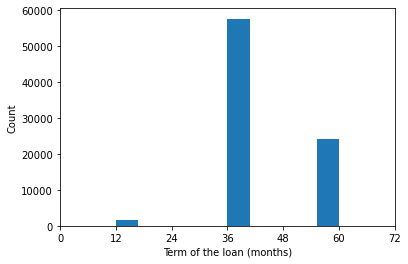

In [23]:
# To plot an histogram that shows the distribution of the length
# of the loans expressed in months
ticks = [0, 12, 24, 36, 48, 60, 72]
labels = ('{}'.format(x) for x in ticks)
plt.hist(data = prosper_clean, x = 'Term')
plt.xticks(ticks, labels)
plt.xlabel('Term of the loan (months)')
plt.ylabel('Count');

#### Observation:
 It was observed that the Term column has only three unique values which are 12, 36 and 60 months. These correspond to 1 year, 3 years and 5 years respectively. From the visualization, it can be ascertained that the most frequent term for the loans is 36 months, in order words 3 years 

### Insight 2

#### Question: How is the loan status distributed in this dataset?

#### Visualisation

In [24]:
# Get the uniques values in the LoanStatus column
prosper_clean.LoanStatus.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

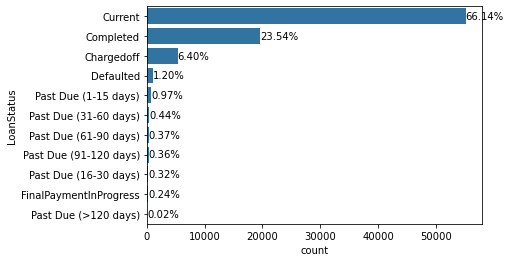

In [25]:
# Plot a bar chart to visualise the distribution of the LoanStatus column
base_color = sb.color_palette()[0]
status_order = prosper_clean.LoanStatus.value_counts().index
sb.countplot(data = prosper_clean, y = 'LoanStatus', order = status_order, color = base_color);
# to print the percentages of each loan status on the bar
n_status = prosper_clean.LoanStatus.value_counts().sum()
status_count = prosper_clean.LoanStatus.value_counts()
for n in range(status_count.shape[0]):
    count = status_count[n]
    percentage = '{:0.2f}%'.format(100*count/n_status)
    plt.text(count+1, n, percentage, va = 'center')

#### Observation
It was observed that the loans which are currently active made up about two-thirds of the data. The completed loans made up approximately a quarter of the loans and loans which are past due for over 120 days are not significant in number.

### Insight 3

#### Question: What is the distribution of the Borrower Annual Percentage Rate?

#### Visualisation

In [26]:
# get the descriptive statistics of the 'BorrowerAPR' column of the dataset
prosper_clean.BorrowerAPR.describe()

count    83397.000000
mean         0.228663
std          0.079011
min          0.045830
25%          0.167320
50%          0.221400
75%          0.293410
max          0.423950
Name: BorrowerAPR, dtype: float64

In [27]:
# convert the values to percentage for easy interpretation
prosper_clean.BorrowerAPR = prosper_clean.BorrowerAPR.apply(lambda a: int(a*100))

In [28]:
# confirm that the change has been effected
prosper_clean.BorrowerAPR.sample(5)

68109     14
51865     12
45533     26
100355     8
29232     20
Name: BorrowerAPR, dtype: int64

In [29]:
# get the new descriptive statistics
prosper_clean.BorrowerAPR.describe()

count    83397.000000
mean        22.358982
std          7.880988
min          4.000000
25%         16.000000
50%         22.000000
75%         29.000000
max         42.000000
Name: BorrowerAPR, dtype: float64

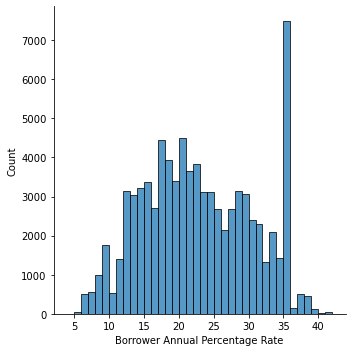

In [30]:
# now plot an histogram to show the distribution of the data.
apr_bins = np.arange(4, prosper_clean.BorrowerAPR.max() + 1,1 )
sb.displot(prosper_clean.BorrowerAPR, bins = apr_bins, kde = False)
plt.xlabel('Borrower Annual Percentage Rate');

#### Observation
The histogram shows a unimodal variation of the BorrowerAPR data. The borrower annual percentage rates were mostly below thirty five percent and the modal APR is thirty five percent.

### Insight 4

#### Question: What is the distribution of the BorrowerRate in the dataset?


#### Visualisation

In [31]:
# get the descriptive statistics of the 'BorrowerRate' column 
prosper_clean.BorrowerRate.describe()

count    83397.000000
mean         0.197815
std          0.073931
min          0.040000
25%          0.139600
50%          0.189900
75%          0.257900
max          0.360000
Name: BorrowerRate, dtype: float64

In [32]:
# change the values of the BorrowerRates to percentage for easy interpretation
prosper_clean.BorrowerRate = prosper_clean.BorrowerRate.apply(lambda b: int(b*100))
# get the new descriptive statistics
prosper_clean.BorrowerRate.describe()

count    83397.000000
mean        19.213929
std          7.380297
min          4.000000
25%         13.000000
50%         18.000000
75%         25.000000
max         36.000000
Name: BorrowerRate, dtype: float64

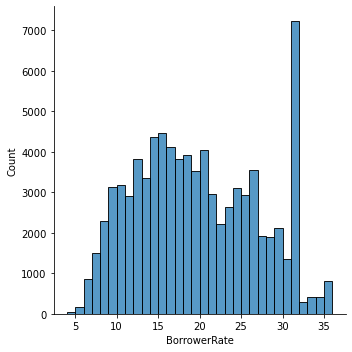

In [33]:
# plot the histogram showing the distribution of the BorroweRate
rate_bins = np.arange(4, 37,1)
sb.displot(prosper_clean.BorrowerRate, bins = rate_bins, kde = False);

#### Observation
The distribution of the BorrowerRate is very similar to the distribution of the BorrowerAPR. However, the modal BorrowerRate is thirty two percent.

### Insight 5

#### Question: What is the distribution of the ProsperScore

#### Visualisation

In [34]:
# to get the unique values of the 'ProsperScore'
prosper_clean.ProsperScore.unique()

array([ 7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6.,  1.])

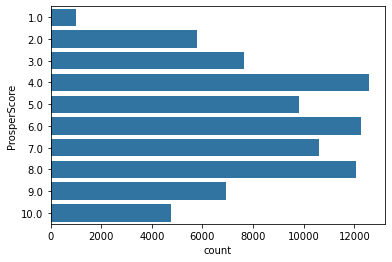

In [35]:
# to plot the values on a bar chart
sb.countplot(data = prosper_clean, y = 'ProsperScore', color = base_color);

#### Observation
It was observed that the modal rating is 4.0 and there were very few loans with rating of 1.0. However, most of the rating was from 4 to 10.

### Insight 6

#### Question: What is the distribution of the employment statuses of the those that took the loan?

#### Visualisation

In [36]:
# to find the unique values of the 'EmploymentStatus' column
prosper_clean.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

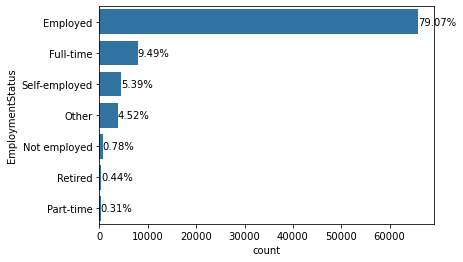

In [37]:
# to plot a bar chart showing the frequency of each employment status in
# descending order of magnitude
status_order = prosper_clean.EmploymentStatus.value_counts().index
sb.countplot(data = prosper_clean, y = 'EmploymentStatus', order = status_order, color = base_color)

# to print the percentage of each employment status on its bar
n_employment = prosper_clean.EmploymentStatus.value_counts().sum()
e_count = prosper_clean.EmploymentStatus.value_counts()
for i in range(e_count.shape[0]):
    count = e_count[i]
    percent = '{:0.2f}%'.format(100*count/n_employment)
    plt.text(count + 1, i, percent, va = 'center')



#### Observation
The employment status of about eight percent of the borrowers at the time they posted the listing is 'Employed'. The fewest employment status is 'Part-time'

### Insight 7

#### Question: What is the distribution of the debt-to-income ratio in the dataset?

#### Visualisation

In [38]:
# get the descriptive statistics of the 'DebtToIncomeRatio' column
prosper_clean.DebtToIncomeRatio.describe()

count    83397.000000
mean         0.259735
std          0.306640
min          0.000000
25%          0.160000
50%          0.240000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

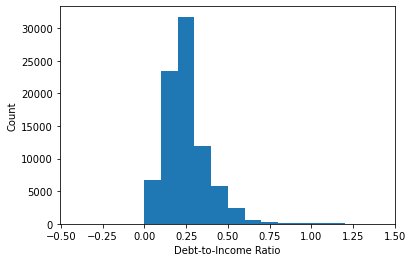

In [39]:
# plot a histogram to depict the distribution of the DebtToIncomeRatio 
bins = np.arange(0, prosper_clean.DebtToIncomeRatio.max()+ 0.1, 0.1 )
plt.hist(data = prosper_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim(right = 1.5)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Count');

#### Observation
The debt-to-income ratios are densely packed between 0.00 and 0.75. However, the ratio with the highest frequency is 0.25. This implies that most borrowers dedicate twenty five percent of their gross monthly income to service the monthly debt payment. 

## Insight 8

#### Question: What is the distribution of the monthly loan payments of the borrowers in the dataset?

#### Visualisation

In [40]:
# get the descriptive statistics of the MonthlyLoanPayments column
prosper_clean.MonthlyLoanPayment.describe()

count    83397.000000
mean       289.624312
std        184.789967
min          0.000000
25%        156.810000
50%        249.050000
75%        385.740000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

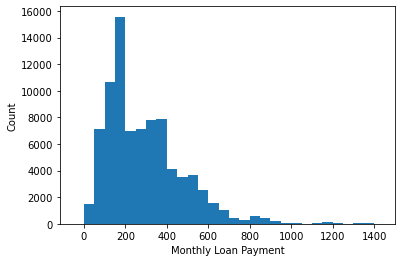

In [41]:
# plot the histogram which shows the distribution of the monthly loan payments
bins_m = np.arange(0, 2251.51+50, 50)
plt.hist(data = prosper_clean, x = 'MonthlyLoanPayment', bins = bins_m)
plt.xlim(right = 1500)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count');

#### Observation: 
Most of the monthly loan payments were in the 0 to 800 range. The distribution is skewed to the right and 200 monthly loan payment has the highest frequency.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In the univariate exploration I did on the columns I discovered that most loanees took out the loans for 3 years and at the time of collection of the data most of the loans were active. The visualisation of the borrower annual percentage rate showed a sharp peak at the 35% mark having over 7000 counts. This was also noticed in the borrower interest rate but now at the 31% mark. 4 was the modal prosper score and 80% of the loanees were employed at the time the data was taken. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The debt to income ration is distributed between 0.25 and 0.75. However, there was an outlier 10.01 and I had to set the limit of the horizontal axis to 1.5. The distribution of the monthly loan payments is largely right skewed and there were outlier values. Hence, I had to set the limit of the horizontal axes to 1500 to get a plot that can be easily interpreted.

## Bivariate Exploration

In this section I want to explore the relationships that exist between different pairs of variables of the dataset that will eventually lead to the answer of the questions of interest in the dataset. The questions is:
> What are the factors that most strongly affect the scheduled monthly loan payments?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. Term
2. LoanStatus
3. BorrowerAPR
4. BorrowerRate
6. LenderYield
7. ProsperScore
8. Occupation
9. EmploymentStatus
10. EmploymentStatusDuration
11. DebtToIncomeRatio
12. MonthlyLoanPayment
13. Recommedations
14. Investors

### Insight 1

#### Question: What is the relationship between the scheduled monthly loan payments and the employment status?

#### Visualisation

In [42]:
# get the unique values in the 'EmploymentStatus' column
prosper_clean.EmploymentStatus.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [43]:
# get the counts of each employment status
prosper_clean.EmploymentStatus.value_counts()

Employed         65945
Full-time         7913
Self-employed     4495
Other             3772
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [44]:
# get the employment status in decreasing order or magnitude of the average
# monthly loan payment
prosper_clean.groupby('EmploymentStatus').MonthlyLoanPayment.mean().sort_values(ascending= False)

EmploymentStatus
Employed         307.962886
Self-employed    275.126133
Other            231.188282
Not employed     200.888737
Full-time        191.616277
Retired          161.795668
Part-time        118.893320
Name: MonthlyLoanPayment, dtype: float64

In [45]:
# set the order of the 'EmploymentStatus' column to the order of decreasing average monthly loan payment
employment_order = ['Employed', 'Self-employed', 'Other', 'Not employed', 'Full-time', 'Retired', 'Part-time']
order_emp = pd.api.types.CategoricalDtype(ordered = True, categories = employment_order)
prosper_clean['EmploymentStatus'] = prosper_clean['EmploymentStatus'].astype(order_emp)

In [46]:
# get the description of the 'MonthlyLoanPayment' column
prosper_clean.MonthlyLoanPayment.describe()


count    83397.000000
mean       289.624312
std        184.789967
min          0.000000
25%        156.810000
50%        249.050000
75%        385.740000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

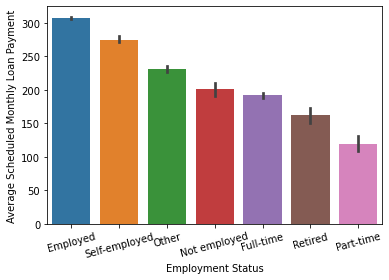

In [47]:
# Adapt a barchart to plot the average scheduled monthly loan payment
# against the employment status with color coding to enhance interpretation

sb.barplot(data = prosper_clean, x = 'EmploymentStatus', y = 'MonthlyLoanPayment')
plt.xticks(rotation = 15)
plt.xlabel('Employment Status')
plt.ylabel('Average Scheduled Monthly Loan Payment');

#### Observation
In the visualisation above, it can be observed that the employed borrowers had the highest average scheduled monthly loan payments followed by the self employed class while the borrowers employed part-time had the lowest average scheduled monthly loan payments. The averages for the not employed and full time classes were very close. The retired class had an average that was between the full time and part time averages.

### Insight 2 

#### Question: Does the number of investors who funded the loan affect the monthly loan payment?

#### Visualisation

In [48]:
# get the descriptive statistics of the 'Investors' column
prosper_clean.Investors.describe()

count    83397.000000
mean        67.810161
std         94.190355
min          1.000000
25%          1.000000
50%         32.000000
75%         96.000000
max       1189.000000
Name: Investors, dtype: float64

In [49]:
# get the descriptive statistics of the 'MonthlyLoanPayment' column
prosper_clean.MonthlyLoanPayment.describe()

count    83397.000000
mean       289.624312
std        184.789967
min          0.000000
25%        156.810000
50%        249.050000
75%        385.740000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [77]:
# define a function to contain the axes labels and title of the plot
def label(a,b,c):
    """
    This function assigns the axes labels and title of the plot where
    a: xlabel
    b: ylabel
    c: title
    """
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(c, y = 1.0, fontdict = {'weight': 'bold'})
    plt.show()

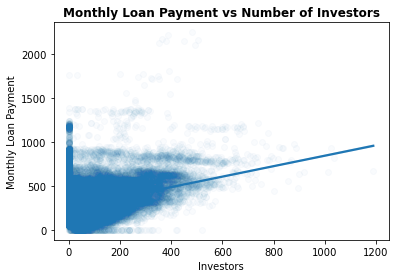

In [74]:
# use a scatterplot to depict the relationship between the number of investors
# and the scheduled monthly loan payment.
sb.regplot(data = prosper_clean, x = 'Investors', y = 'MonthlyLoanPayment', scatter_kws = {'alpha': 1/40})
label('Investors', 'Monthly Loan Payment', 'Monthly Loan Payment vs Number of Investors')

##### Let's use the heatmap to show exactly how the points are concentrated

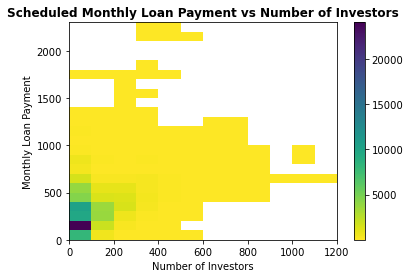

In [78]:
# use a heatmap to show the relationship the scheduled montly loan payments and 
# the number of investors who invested in the loan.
bin_x = np.arange(0, 1189+100, 100)
bin_y = np.arange(0, 2251+100, 100)
plt.hist2d(data = prosper_clean, x = 'Investors', y = 'MonthlyLoanPayment',
          cmin = 0.5, cmap = 'viridis_r', bins = [bin_x, bin_y])
plt.colorbar()
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors');

#### Observation
In the scatter plot it was observed that there was a positive correlation between the number of investors and the scheduled monthly loan payment. It was also evident that most of the borrowers had less than 400 investors. In the heatmap it showed that majority of the borrowers who scheduled 500 and less for monthly payments and had less than 100 investors and this portion is the most densely packed in the dataset.

### Insight 3

#### Question: What is the relationship between the borrower annual percentage rate and the scheduled monthly loan payment?


#### Visualisation

In [52]:
# get the descriptive statistics of the 'BorrowerAPR' 
prosper_clean.BorrowerAPR.describe()

count    83397.000000
mean        22.358982
std          7.880988
min          4.000000
25%         16.000000
50%         22.000000
75%         29.000000
max         42.000000
Name: BorrowerAPR, dtype: float64

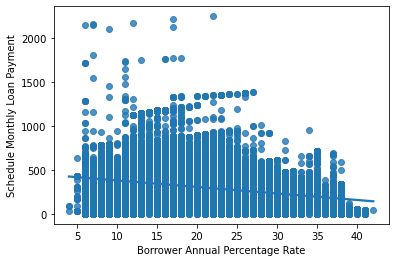

In [53]:
# depict the relationship between the scheduled monthly payment and the 
# borrower annual percentage rate using a scatterplot
sb.regplot(data = prosper_clean, x = 'BorrowerAPR', y = 'MonthlyLoanPayment')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Schedule Monthly Loan Payment');

##### Let's use the heatmap to show exactly how the points are concentrated

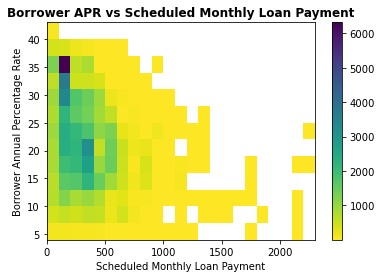

In [80]:
# to use a heatmap to depict the relationship
bins_x = np.arange(0, 2251+100, 100)
bins_y = np.arange(4, 42+3, 3)
plt.hist2d(data = prosper_clean, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', cmin = 0.5,
          cmap= 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
label('Scheduled Monthly Loan Payment','Borrower Annual Percentage Rate', 'Borrower APR vs Scheduled Monthly Loan Payment');


#### Observation
The scatter plot showed a slightly negative correlation between the borrower annual percentage rate and the scheduled monthly loan payment. The heat map showed a concentration of values below the 500 mark for the scheduled monthly loan payment and a peak concentration at the 35 mark for the borrower annual percentage rate.

### Insight 5

#### Question; How does the term of the loan affect the scheduled monthly loan payment?


#### Visualisation

In [55]:
# get the descriptive statistics of the 'Term' column 
prosper_clean.Term.describe()

count    83397.000000
mean        42.482248
std         11.654919
min         12.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: Term, dtype: float64

In [56]:
# get the unique values in the 'Term' column
prosper_clean.Term.unique()

array([36, 60, 12], dtype=int64)

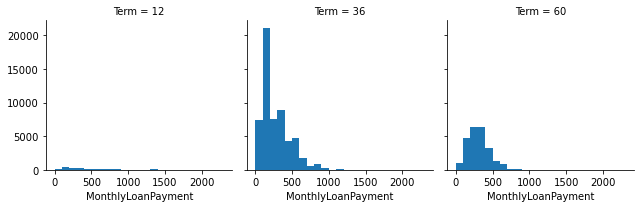

In [57]:
# use seaborn.FacetGrid() function to plot the scheduled monthly loan
# payments for each of the unique values in the 'Term' column
bins_m = np.arange(0, 2251.51+100, 100)
h = sb.FacetGrid(data = prosper_clean, col = 'Term')
h.map(plt.hist, 'MonthlyLoanPayment', bins = bins_m );

#### Observation
Most of the data was concentrated in the 36-month term. And there was a peak at about 200 monthly loan payment which had over 20000 counts.

### Insight 6

#### Question: What is the relationship between the debt-to-income ratio and the scheduled monthly loan payment?

#### Visualisation

In [58]:
# get the descriptive statistics and the number of unique values for the 
# DebtToIncomeRatio column
print(prosper_clean.DebtToIncomeRatio.describe())
print(prosper_clean.DebtToIncomeRatio.nunique())

count    83397.000000
mean         0.259735
std          0.306640
min          0.000000
25%          0.160000
50%          0.240000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64
260


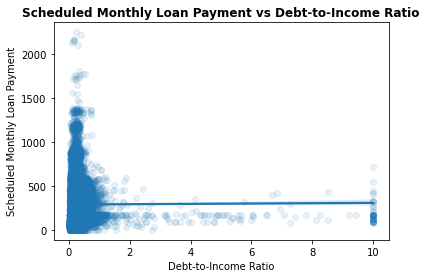

In [81]:
# use a scatter plot to depict the relationship between the debt-to-income ratio
# and the scheduled monthly loan payment
sb.regplot(data = prosper_clean, x = 'DebtToIncomeRatio', y = 'MonthlyLoanPayment',
          scatter_kws = {'alpha': 1/10})
label('Debt-to-Income Ratio','Scheduled Monthly Loan Payment','Scheduled Monthly Loan Payment vs Debt-to-Income Ratio');

#### Observation
In the plot above we can observe that most of the debt-to-income ratio fell below 2. There were outliers at ratio of 10. The the regression line is flat. Hence this indicates that the scheduled monthly loan payment was highest for loanees with very low debt-to-income ratio. However, the scheduled monthly loan payment is not strongly affected by the debt-to-income ratio when the ratio is high. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. In the plot of the average monthly loan payment and employment status it was observed that the employed category had were able to pay more monthly. Hence employment status is one of the major factors that affect the monthly loan payments in the data.
2. In the plot of the number of investors and the scheduled monthly loan payment it was discovered that most the loanees had less than 200 investors and paid less than 500 monthly. However, those with more investors had relatively higher scheduled monthly loan payments.
3. Loanees had higher scheduled monthly loan payments when they are on a 36-month loan term. This may be associated with the fact that bigger sums were awarded for this period of time, smaller sums were borrowed over one year, or bigger sums were largely spread over 60 months. Hence, the term of a loan is also a major factor which affects the scheduled monthly loan payment.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that the borrower annual percentage rate had a negative correlation with the scheduled monthly loan payment.

## Multivariate Exploration


### Insight 1


#### Question
How does the term of the loan affect the distribution of the scheduled monthly income and the number of investors.

#### Visualisation

In [60]:
prosper_clean.shape

(83397, 42)

In [61]:
# first generate a random 500 samples to avoid overplotting.
np.random.seed(1000)
sample = np.random.choice(prosper_clean.index, 500, replace = False)
prosper_subset = prosper_clean.loc[sample]
prosper_subset.sample()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
19906,1D9135979098875404E369C,1070948,2013-12-13 10:45:30.893000000,36,Current,18,15,0.1435,0.13507,0.0599,...,121889,20000,2013-12-17 00:00:00,Q4 2013,696.74,1.0,0,0,0.0,1


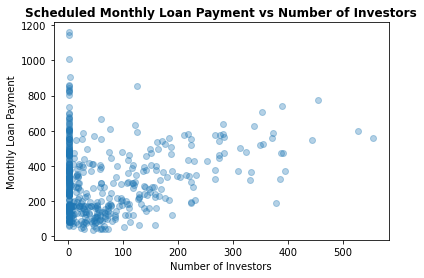

In [82]:
# Now plot a scatterplot that depicts the scheduled monthly loan payments and 
# number of investors
sb.regplot(data = prosper_subset, x = 'Investors', y = 'MonthlyLoanPayment', scatter_kws = {'alpha': 1/3},
          fit_reg = False)
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors');

In [63]:
prosper_subset.Term.dtype

dtype('int64')

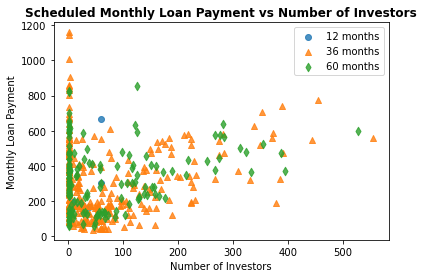

''

In [84]:
# now to plot the third variable which the the 'Term' column
# write a loop that assigns each term to a shape to be plotted on the scatter plot
term_marker = [[12, 'o'], [36, '^'], [60, 'd']]
for term, marker in term_marker:
    plot_data = prosper_subset.loc[prosper_subset.Term == term]
    sb.regplot(data = plot_data, x = 'Investors', y = 'MonthlyLoanPayment',
          fit_reg = False, x_jitter = 0.05, marker = marker)
plt.legend(['12 months', '36 months', '60 months'])
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors');
;


#### Observation
In the plot above most of the loanees who took out loans for five years have less than a hundred investors and they paid relatively less scheduled monthly loan payment. The loanees who took the loan for 3 years however, had the highest scheduled monthly loan payment and also the highest number of investors.



### Insight 2

#### Question
How does the debt-to-income ratio affect the distribution of the scheduled monthly loan payment and the number of investors?

#### Visualisation

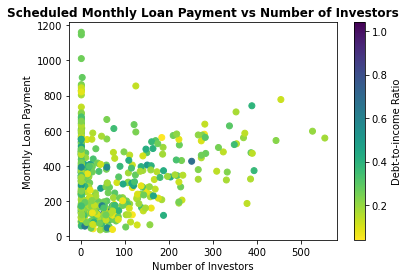

''

In [85]:
# Use plt.scatter() to plot these variables since they are all quanititatve variables and use 
# sequential color encoding to depict the debt-to-income ratio.
plt.scatter(data = prosper_subset, x = 'Investors', y = 'MonthlyLoanPayment',
            c = 'DebtToIncomeRatio', cmap = 'viridis_r')
plt.colorbar(label = 'Debt-to-income Ratio')
label('Number of Investors', 'Monthly Loan Payment', 'Scheduled Monthly Loan Payment vs Number of Investors');
;

#### Observation
It can be observed from the plot above that most of the loanees that had 0 investors had debt-to-income ratio of 0.5 or less and the loanees that had the highest investors number of and scheduled monthly loan payment had a debt-to-income ratio of 0.5. 

### Insight 3

#### Question
How does the term affect the distribution of the average scheduled monthly loan payment and the employment status?

#### Visualisation

In [66]:
prosper_clean.EmploymentStatus.unique()

['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed', 'Retired', 'Part-time']
Categories (7, object): ['Employed' < 'Self-employed' < 'Other' < 'Not employed' < 'Full-time' < 'Retired' < 'Part-time']

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


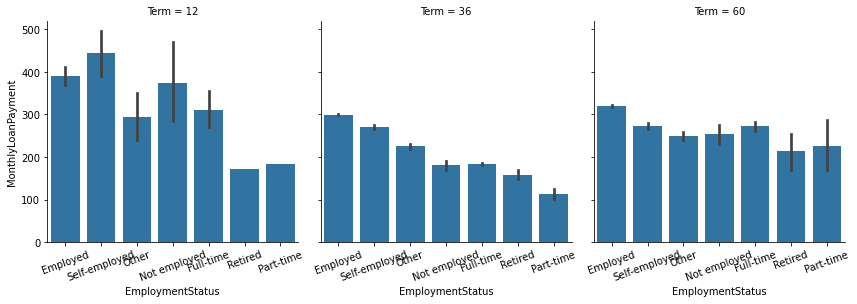

In [67]:
# use seaborn's FacetGrid() function to plot the distribution of the average scheduled monthly loan payment
# and the employment status over the three terms

s = sb.FacetGrid(data = prosper_clean, col = 'Term', height = 4)
s.map(sb.barplot, 'EmploymentStatus', 'MonthlyLoanPayment')
s.set_xticklabels(rotation = 20);


#### Observation
The plots above show that the loanees who took loans for 36 months and work part time have the lowest average scheduled monthly loan payment and the Self-employed loanees who took the loan for 12 months have the highest average scheduled monthly loan payment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that loanees with high scheduled monthly payments have a low debt-to-income ratio, either self-employed or employed, took the loan for thirty six months and had a lot of investors.

### Were there any interesting or surprising interactions between features?

> I found that the average scheduled monthly income for loanees who took the loan for 36 months was lower and this is quite interesting because the best perfomers in terms of scheduled monthly loan payements are those in this category. Also, it may be as a result of the high number of loanees in this region.

## Conclusions
> In conclusion, about eighty four thousand observations were analysed in this part with a focus on twelve variables to determine the major factors that affected the scheduled monthly loan payment for each loanee. In this part, we discovered that the major variables that most strongly affect the scheduled monthly loan payment are the number of investors,term of the loan(in months), employment status and the debt-to-income ratio.